In [108]:
from ipywidgets import interact
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('text.latex', preamble=r'''\usepackage{amsmath}
          \usepackage{physics}
          \usepackage{siunitx}
          ''')

In [109]:
N = 20_000
t = np.arange(N)
omega_true = 0.015
sigma = 0.2
B1_true = 1/2
B2_true = np.sqrt(3/4)

In [110]:
rng = np.random.default_rng(seed=42)
noise = rng.standard_normal(size=N) * sigma
signal = B1_true * np.cos(omega_true * t) + B2_true * np.sin(omega_true * t) + noise 

In [122]:
# omegas = np.linspace(0.01, 0.02, num=1000)
omegas = np.linspace(omega_true*.85, omega_true*1.15, num=1000)
R1 = np.sum(signal[np.newaxis, :] * np.cos(omegas[:, np.newaxis] * t[np.newaxis, :]), axis=1)
R2 = np.sum(signal[np.newaxis, :] * np.sin(omegas[:, np.newaxis] * t[np.newaxis, :]), axis=1)

def Q(r, theta):
    B1 = r * np.sin(theta)
    B2 = r * np.cos(theta)
    f = B1 * np.cos(omegas[:, np.newaxis] * t[np.newaxis, :]) + B2 * np.sin(omegas[:, np.newaxis] * t[np.newaxis, :])
    return np.sum((signal[np.newaxis, :] - f)**2, axis=1)

def plot_Q(*args):
    plt.plot(omegas, Q(*args))

square_error = (R1**2 + R2**2) / N
print(omegas[np.argmax(square_error)])
print(omega_true)

0.015002252252252251
0.015


In [123]:
# interact(plot_Q, r=(0, 2, .01), theta=(0, np.pi, .01))

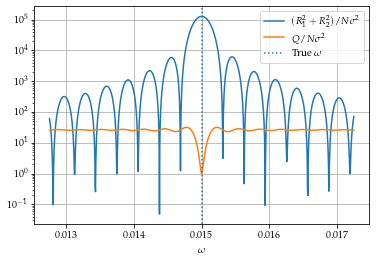

In [124]:
plt.semilogy(omegas, (R1**2 + R2**2) / N / sigma**2, label='$(R_1^2 + R_2^2)/N\\sigma^2$')
plt.semilogy(omegas, Q(1, np.pi/6) / N/ sigma**2, label='$Q/N\\sigma^2$')
plt.axvline(omega_true, label='True $\\omega$', ls=':')
plt.xlabel('$\\omega$')
plt.legend()
plt.grid('on')
plt.savefig('figures/chisquare_omega.pdf')

In [114]:
from scipy.optimize import minimize

def fun(par, t, signal):
    omega, B1, B2 = par
    diffs = signal - B1 * np.cos(t * omega) - B2 * np.sin(t * omega)
    return(np.sum(diffs**2))

res = minimize(fun, [.0145, 1, 1], args=(t, signal), method='Nelder-Mead')

In [115]:
num_solution = np.array(res.x)
true_solution = np.array([omega_true, B1_true, B2_true])

print(num_solution)
print(true_solution)
print(abs(num_solution - true_solution) / true_solution)

[0.01500006 0.50286933 0.87018042]
[0.015     0.5       0.8660254]
[4.23449770e-06 5.73865602e-03 4.79779839e-03]


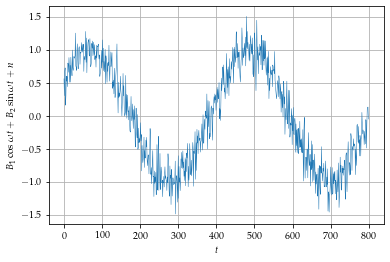

In [118]:
plt.plot(t[:800], signal[:800], lw=.5)
plt.xlabel('$t$')
plt.ylabel('$B_1 \\cos \\omega t + B_2 \\sin \\omega t + n$')
plt.grid('on')
plt.savefig('figures/signal.pdf')